In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sys
import numpy as np 
import tensorflow as tf

## 지금 부터는 seed 안잡습니다. 여러분이랑 강사님이랑 값이 달라도 좀 상관없겠죠,,,

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print("train set of image: %d 개" % (X_train.shape[0]))
print("test set of image: %d 개" % (X_test.shape[0]))
#[0]은 row의 갯수를 샌겁니다....

train set of image: 60000 개
test set of image: 10000 개


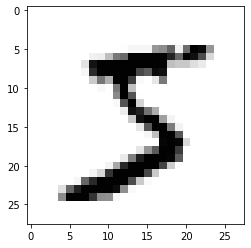

In [4]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d' %i)
    sys.stdout.write('\n\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0

  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0

  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0

  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0

  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0

  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0

  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0

In [6]:
print(X_train[0].shape[0])
#X_train의[0]번째 값의 row의 갯수가 shape[0] == 28개 
#X_train의[0]번째 값의 column의 갯수가 shape[1] == 28개 
#즉, 28 X 28 pixel 크기라는 것이다.

28


In [7]:
print(X_train[0].shape[1])

28


In [8]:
X_train
#출력결과에서 [[[  ]]] 이러한 형태로 3차원 리스트 형태인것을 알 수 있다.

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
print(X_train.shape[0])
#6만개의 이미지 28*28 이미지가 6만장이 있다. 
print(X_train.shape)

60000
(60000, 28, 28)


In [10]:
#위에서 알수 있듯이 
# MNIST 오리지날 데이터는 따져보면 3차원데이터이다. 위와 같은 2차원 데이터를 아주 많이 곂쳐놓은것과 같다

In [11]:
X_train = X_train.reshape(X_train.shape[0], 784)
# (60000, 28, 28)의 3차원을 (60000, 784)의 2차원으로 바꾼다. 
# X_train = X_train.reshape(X_train.shape[0], -1)
#28 X 28짜리 이미지가 784개 이므로 해당 3차원데이터를 2차원으로 바꾸려면 .... 개수나 -1을 써줘도 된다. 
X_train = X_train.astype(float)
#텐서에는 float타입으로 넣어줘야 한다. 
X_train = X_train / 255 
#스케일을 0~1사이의 값으로 바꿔줄것이다. 

In [12]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [15]:
print(X_test.shape)
print(X_test.shape[0])

(10000, 28, 28)
10000


In [16]:
#test에도 똑같이 적용해준다.
X_test = X_test.reshape(X_test.shape[0], 784)
X_test = X_test.astype(float)
X_test = X_test / 255 

In [17]:
print(X_train[0].shape[0])

784


In [18]:
print(X_train[0].shape[1])
#2차원이었던 X_train[0]을 한차원 낮췄기 때문에 shape[1]축이 사라지고 [0]축의 갯수가 늘어났다. 

IndexError: tuple index out of range

In [24]:
print(Y_train.shape)
print(X_train.shape)

(60000, 10)
(60000, 784)


In [19]:
print(Y_train[0])

5


In [13]:
##이 문제는 다중분류이다. 사람이 쓴글자를 컴퓨터가 10개의 숫자로 분류하는문제에요 
##그래서 타겟값을 원핫 인코딩으로 바꿔줘야 하죠....

In [20]:
Y_train = utils.to_categorical(Y_train, 10)
Y_test = utils.to_categorical(Y_test, 10)

In [21]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
len(Y_train)

60000

In [25]:
model = Sequential()
model.add(Dense(512, input_dim=28*28, activation = 'relu')) 
#입력은 784개가 들어오는 그걸 512개로 줄여볼겁니다. 
model.add(Dense(10, activation='softmax'))
#다중 분류문제이므로 softmax를 씁니다. 

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy', 
             optimizer = 'adam', metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    #해당 폴더의 존재유무를 체크해준다. 

modelpath = './model/{epoch: 02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose=1,
                              save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [21]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                   epochs=30, batch_size =200, verbose=0, callbacks=[early_stopping, checkpointer])
#validation split할거 없이 이미 split해놓은 test데이터를 넣어주자!



Epoch 00001: val_loss improved from inf to 0.15513, saving model to ./model\ 1-0.1551.hdf5

Epoch 00002: val_loss improved from 0.15513 to 0.10529, saving model to ./model\ 2-0.1053.hdf5

Epoch 00003: val_loss improved from 0.10529 to 0.08468, saving model to ./model\ 3-0.0847.hdf5

Epoch 00004: val_loss improved from 0.08468 to 0.07754, saving model to ./model\ 4-0.0775.hdf5

Epoch 00005: val_loss improved from 0.07754 to 0.06889, saving model to ./model\ 5-0.0689.hdf5

Epoch 00006: val_loss improved from 0.06889 to 0.06751, saving model to ./model\ 6-0.0675.hdf5

Epoch 00007: val_loss improved from 0.06751 to 0.06310, saving model to ./model\ 7-0.0631.hdf5

Epoch 00008: val_loss did not improve from 0.06310

Epoch 00009: val_loss did not improve from 0.06310

Epoch 00010: val_loss improved from 0.06310 to 0.06126, saving model to ./model\ 10-0.0613.hdf5

Epoch 00011: val_loss improved from 0.06126 to 0.06080, saving model to ./model\ 11-0.0608.hdf5

Epoch 00012: val_loss improved fr

In [22]:
print("Test Accuracy: %.4f" %(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.9835
Test Accuracy: 0.9835


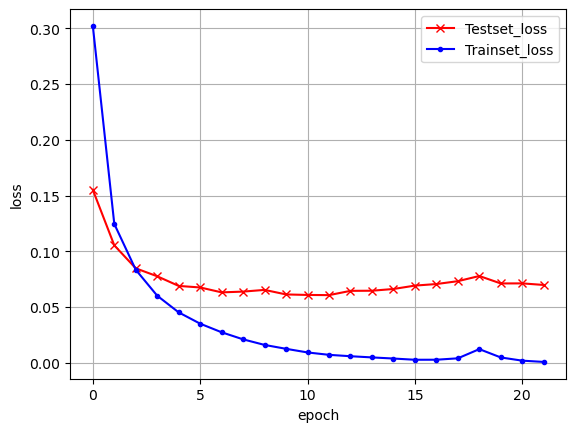

In [36]:
y_vloss = history.history['val_loss']
#validation 오차 
y_loss = history.history['loss']
#training 오차
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='x', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()